# 📌 Real Time Crime Index - Machine Learning Models

This notebook explores crime trends through classification, regression, and clustering models. Results are visualized and exported for integration with Tableau dashboards 📊🗺️.


## 🧪 1. Classification (Violent vs Property Crime)
Using Random Forest to predict crime type based on incident-level features.

In [4]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [5]:
#Loading Dataset
df = pd.read_excel("/Users/pragathi/Documents/Spring Sem/Visual Analytics/Project/final_sample.xlsx")
df.head()

,Month,Year,Date,State,Region,Murder,Rape,Robbery,Aggravated Assault,Burglary,Theft,Motor Vehicle Theft,FBI.Population.Covered,Number.of.Agencies,Total_Incidents,Crime_Cluster
0,1,2018,2018-01-01,TX,South,0,9,7,22,58,234,33,128387,1,363,0
1,2,2018,2018-02-01,TX,South,0,11,5,17,70,238,13,128387,1,354,0
2,3,2018,2018-03-01,TX,South,0,11,6,27,78,212,29,128387,1,363,0
3,4,2018,2018-04-01,TX,South,1,9,8,33,80,199,21,128387,1,351,0
4,5,2018,2018-05-01,TX,South,0,12,8,39,67,218,15,128387,1,359,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41316 entries, 0 to 41315
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Month                   41316 non-null  int64         
 1   Year                    41316 non-null  int64         
 2   Date                    41316 non-null  datetime64[ns]
 3   State                   41316 non-null  object        
 4   Region                  41316 non-null  object        
 5   Murder                  41316 non-null  int64         
 6   Rape                    41316 non-null  int64         
 7   Robbery                 41316 non-null  int64         
 8   Aggravated Assault      41316 non-null  int64         
 9   Burglary                41316 non-null  int64         
 10  Theft                   41316 non-null  int64         
 11  Motor Vehicle Theft     41316 non-null  int64         
 12  FBI.Population.Covered  41316 non-null  int64 

In [7]:
# Creating total incident column
df['Total_Incidents'] = df[['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 
                            'Burglary', 'Theft', 'Motor Vehicle Theft']].sum(axis=1)

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
# Create classification label
violent = df[['Murder', 'Rape', 'Robbery', 'Aggravated Assault']].sum(axis=1)
property_ = df[['Burglary', 'Theft', 'Motor Vehicle Theft']].sum(axis=1)

df['Crime_Type'] = np.where(violent > property_, 'Violent', 'Property')


In [10]:
# Encode crime type into numeric labels
label_encoder = LabelEncoder()
df['Crime_Type_Label'] = label_encoder.fit_transform(df['Crime_Type'])  # 0 = Property, 1 = Violent

In [11]:
# Select features
features = ['Month', 'Year', 'FBI.Population.Covered', 'Number.of.Agencies', 
            'Murder', 'Rape', 'Robbery', 'Aggravated Assault', 
            'Burglary', 'Theft', 'Motor Vehicle Theft']
X = df[features]
y = df['Crime_Type_Label']

In [12]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
#Evaluate the Model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9983059051306873
Confusion Matrix:
 [[8155    0]
 [  14   95]]


In [15]:
# 5-fold cross-validation
cv_scores_class = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Accuracy Scores (Classification):", cv_scores_class)
print("Mean CV Accuracy:", round(cv_scores_class.mean(), 4))

Cross-Validation Accuracy Scores (Classification): [0.99854792 0.99649038 0.99987898 0.99370689 0.99866876]
Mean CV Accuracy: 0.9975


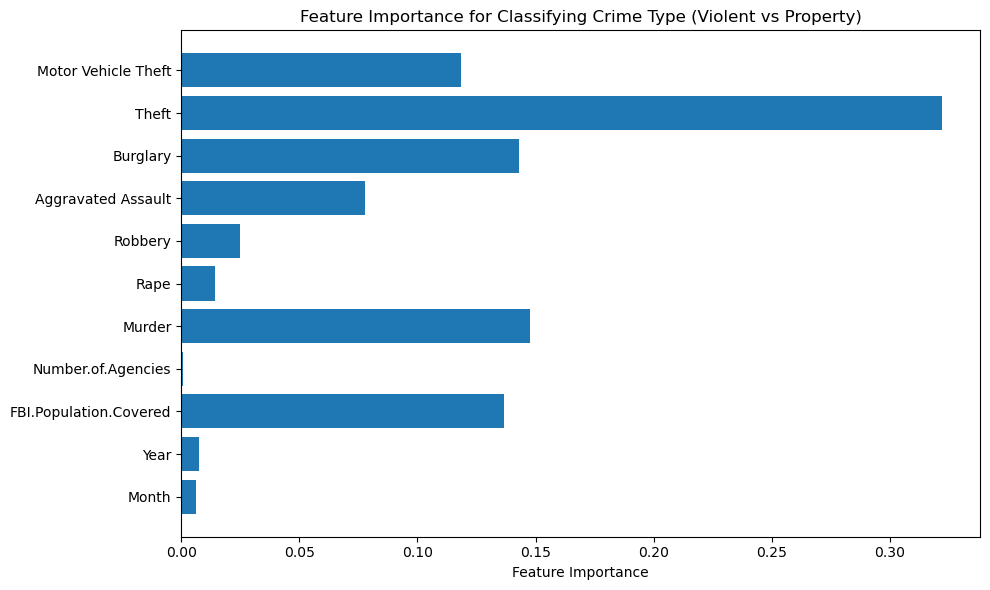

In [16]:
# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Plot it
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Classifying Crime Type (Violent vs Property)")
plt.tight_layout()
plt.show()


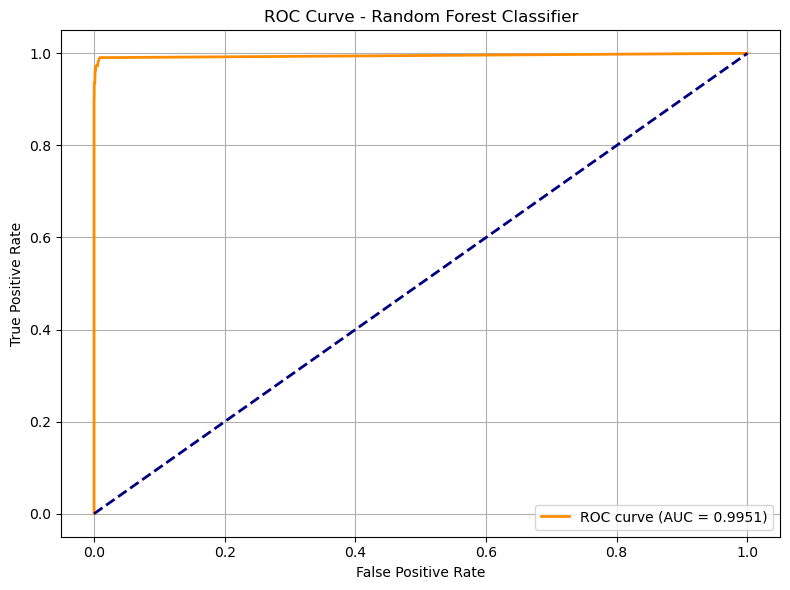

In [17]:
# Get predicted probabilities for the positive class 
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

## 📈 2. Regression (Total Crime Count)
Predicting the number of incidents using Random Forest Regressor.

In [19]:
#predict the total number of incidents
# Features already defined
# Target: total crime count

X = df[features]
y = df['Total_Incidents']

In [20]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
#Train the Regression Model
regr = RandomForestRegressor(random_state=42)
regr.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [22]:
#Evaluate the Model
y_pred = regr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("RMSE:", rmse)

RMSE: 65.30708659728859


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
# 5-fold cross-validation (R2 score by default)
cv_scores_regr = cross_val_score(regr, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Convert negative RMSE to positive
cv_rmse = -cv_scores_regr

print("Cross-Validation RMSE Scores (Regression):", cv_rmse)
print("Mean CV RMSE:", round(cv_rmse.mean(), 2))


Cross-Validation RMSE Scores (Regression): [  64.10259635   54.82944608   86.25395359   49.48243906 4267.58826728]
Mean CV RMSE: 904.45


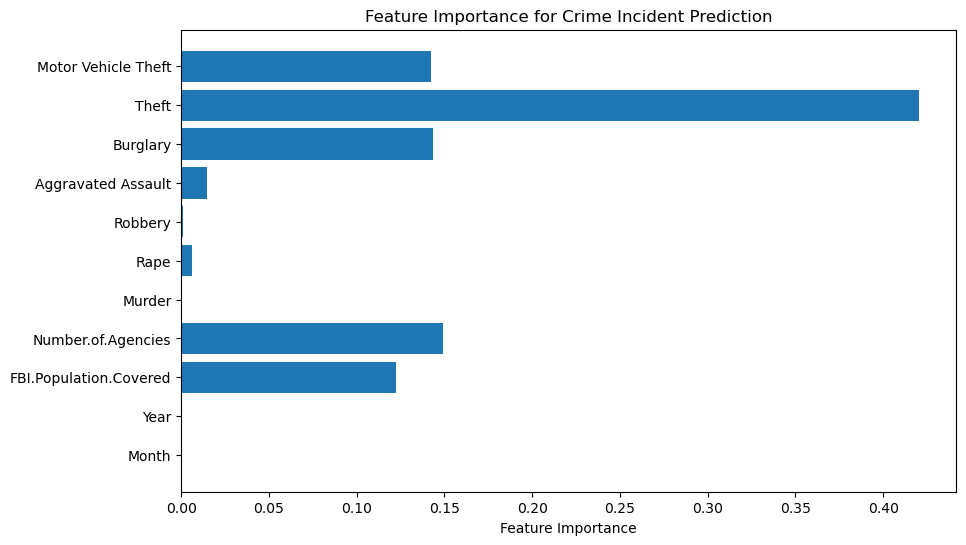

In [24]:
importances = regr.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Crime Incident Prediction")
plt.show()


## 🔍 3. Clustering (Crime Patterns)
Unsupervised learning to find crime patterns using KMeans.

In [26]:
# Choose features for clustering
cluster_features = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault',
                    'Burglary', 'Theft', 'Motor Vehicle Theft', 
                    'FBI.Population.Covered', 'Number.of.Agencies']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cluster_features])


In [27]:
#Fit KMeans Model
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Crime_Cluster'] = kmeans.fit_predict(X_scaled)


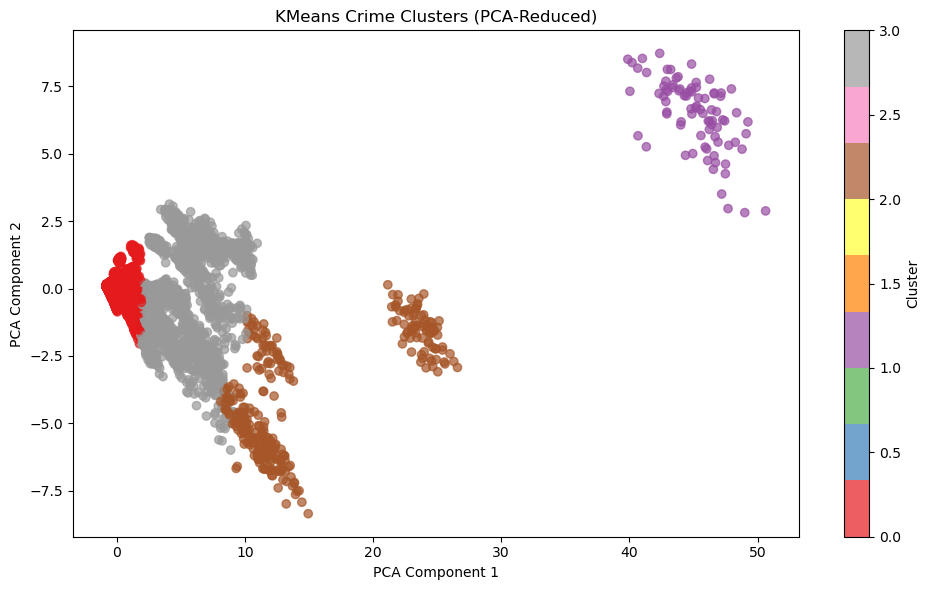

In [28]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Crime_Cluster'], cmap='Set1', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Crime Clusters (PCA-Reduced)")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()


In [29]:
df.groupby('Crime_Cluster')[cluster_features].mean().round(1)


,Murder,Rape,Robbery,Aggravated Assault,Burglary,Theft,Motor Vehicle Theft,FBI.Population.Covered,Number.of.Agencies
Crime_Cluster,,,,,,,,,
0,1.3,6.8,14.8,44.2,51.0,271.2,56.8,193681.6,1.1
1,116.2,896.3,1780.2,5461.0,6141.8,30212.0,6288.3,20274007.0,81.0
2,54.8,188.9,1214.8,2185.9,1815.6,7200.2,2148.9,8434526.9,12.2
3,21.8,81.3,286.9,736.4,714.7,3446.6,881.9,1966666.5,6.2


## 💻 4. Export for Tableau
Save final outputs to use in Tableau dashboard.

In [31]:
df.to_csv("crime_cluster_output.csv", index=False) #for tableau